In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np 
%matplotlib inline

In [2]:
df = pd.read_csv("/home/rohan/Desktop/work/ML-projects1/Fuel-Consumption-Dataset/CO2 Emissions_Canada.csv")
df.head(9)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267


In [3]:
cdf = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']]
cdf.head(9)

,Engine Size(L),Cylinders,Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,33,196
1,2.4,4,29,221
2,1.5,4,48,136
3,3.5,6,25,255
4,3.5,6,27,244
5,3.5,6,28,230
6,3.5,6,28,232
7,3.7,6,25,255
8,3.7,6,24,267


Comparing CO2 emissions wuth ENGINESIZE : 

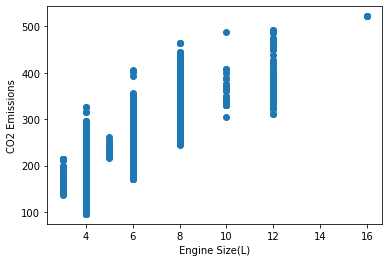

In [38]:
plt.scatter(cdf['Cylinders'], cdf['CO2 Emissions(g/km)'])
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions')
plt.show()

Split the data into train/test set

In [39]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

POLYNOMIAL REGRESSION : 


    At times data may not be linear and can be curvy, in such situations we can use the modified version of linear regression known as POLYNOMIAL REGRESSION. This can be used to model dataset that are quadratic , cubic , so on.
    
    General formula : y = b + theta1X + theta2X^2 (polynomial has degree of 2)
    

PolynomialFeatures() : This is a function in sklearn library , derives new feature sets from original feature set based on the degree of the polynomial function. Therefore in this case since degree of the polynomial is 2 , there will be 3 features generated , degree = 0 , degree = 1, degree = 2.

In [98]:
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn import linear_model as lm


train_x = np.asanyarray(train[['Cylinders']])
train_y = np.asanyarray(train[['CO2 Emissions(g/km)']])

test_x = np.asanyarray(test[['Cylinders']])
test_y = np.asanyarray(test[['CO2 Emissions(g/km)']])


polyFeatures = pf(degree = 2)
train_x_poly = polyFeatures.fit_transform(train_x)
train_x_poly

array([[ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       ...,
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2). Now we can treat this as a normal Linear Regression problem and can use LinearRegression() funtion from sklearn.

In [99]:
clf = lm.LinearRegression()
train_y_ = clf.fit(train_x_poly , train_y)

print("Coefficients : ", clf.coef_)
print("Intercept : ", clf.intercept_)

Coefficients :  [[ 0.         43.62766916 -1.28087714]]
Intercept :  [50.49078069]


Coefficients and Intercepts are parameters of the fit line of the model trained.

plotting the model fit curvy line : 

Text(0, 0.5, 'CO2 Emission')

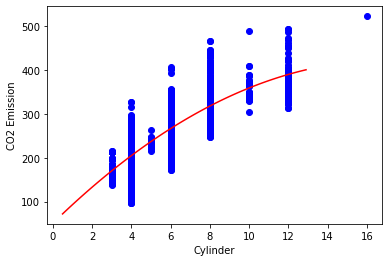

In [100]:
plt.scatter(train['Cylinders'], train['CO2 Emissions(g/km)'], color='blue')
x = np.arange(0.5, 13.0, 0.1)
y = clf.intercept_[0] + clf.coef_[0][1]*x + clf.coef_[0][2]*np.power(x, 2)
plt.plot(x, y, '-r')
plt.xlabel('Cylinder')
plt.ylabel('CO2 Emission')

In [101]:
from sklearn.metrics import r2_score as skscore
test_x_poly = polyFeatures.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-Score : %.2f" % skscore(test_y_ , test_y))

Mean absolute error: 24.24
Residual sum of squares (MSE): 995.56
R2-Score : 0.60
